In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import optimize

import torch
import torch.nn as nn

### Minimizing (x^2 - 2)^2

In [2]:
def loss(x):
    return np.power(np.power(x, 2) - 2, 2)

def gradient(x):
    return 2 * (np.power(x, 2) - 2) * 2 * x

In [3]:
x0 = np.array([np.float64(1.0),])
print(x0.shape)
print(x0.dtype)

(1,)
float64


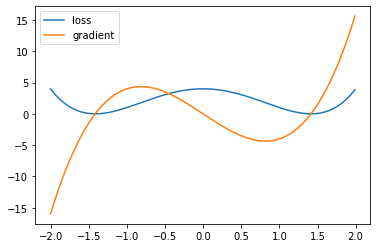

In [4]:
xs = np.arange(-2, 2, 0.01)
plt.plot(xs, loss(xs), label='loss')
plt.plot(xs, gradient(xs), label='gradient')
plt.legend()

In [5]:
result = optimize.minimize(loss, x0, method='BFGS', jac=gradient,
                          options={
                               'disp': True,
                               'gtol': 1e-30,
                          })

         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 14
         Gradient evaluations: 12


In [6]:
loss(result.x)

array([1.97215226e-31])

In [7]:
result.x - np.sqrt(np.float64(2.0))

array([0.])

### Minimizing |x^2 - 2|

In [8]:
def loss(x):
    return np.abs(np.power(x, 2) - 2)

def gradient(x):
    return (np.power(x, 2) - 2) / np.abs(np.power(x, 2) - 2) * 2 * x

In [9]:
x0 = np.array([np.float64(1.2),])
print(x0.shape)
print(x0.dtype)

(1,)
float64


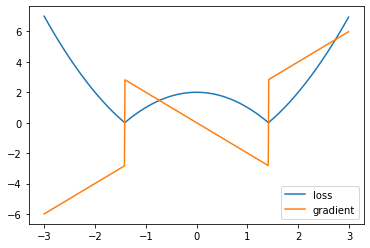

In [10]:
xs = np.arange(-3, 3, 0.01)
plt.plot(xs, loss(xs), label='loss')
plt.plot(xs, gradient(xs), label='gradient')
plt.legend()

In [11]:
result = optimize.minimize(loss, x0, method='BFGS', jac=gradient,
                          options={
                               'disp': True,
                               'gtol': 1e-30,
                          })

         Current function value: 0.560000
         Iterations: 0
         Function evaluations: 45
         Gradient evaluations: 39


In [12]:
loss(result.x)

array([0.56])

### Let's do plain old gradient descent instead as a baseline

In [13]:
x0 = np.array([np.float64(1.2),])
print(x0.shape)
print(x0.dtype)

(1,)
float64


In [14]:
loss(x0)

array([0.56])

In [15]:
for _ in range(50000):
    x0 -= 0.001 * gradient(x0)

In [16]:
loss(x0)

array([0.00100727])